In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import numpy as np
import os
import re

# Importing the Data
This data was taken from the webrobots.io scrape of the kickstarter.com page. I've pulled together data from four different scrape dates (2/16, 2/17, 2/18, and 2/19) and done some initial cleaning. <br><br>For more information on the original dataset and the steps taken for data cleaning, please see the project repository of github <a href = "https://github.com/pezLyfe/TuftsDataScience">here</a>

In [2]:
df = pd.DataFrame() #Initialize a dataframe
for filename in os.listdir(): #Create an iterator for all objects in the working directory
    try: #I'm using try/except here because I'm lazy and didn't clean out the folder
        df = df.append(pd.read_csv(filename), ignore_index = False) #When python finds a valid .csv file, append it
        print(filename, len(df)) #Print the filename and the total # of rows so far to track progress
    except:
        print('Python file') #Print some message when something is wrong    

Python file
2016Cleaned.csv 152455
2017Cleaned.csv 327540
2018Cleaned.csv 523154
2019Cleaned.csv 731628
Python file


# De-duplicating Entries
The scraping method used by webrobots includes historical projects, so each scrape date will likely contain duplicates of previous projects

Additionally, the scrape is done by searching through each sub-category in Kickstarter's organization structure. Since a project can be listed under multiple sub-categories of a single parent category, there will be mupltiple entries of the same project via this method as well. 

Let's determine the extent of the duplicates

In [3]:
df.reset_index(inplace = True)
df.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)
df.drop(labels = 'index', axis = 1, inplace = True)
df.head()

,backers_count,blurb,category,country,created_at,creator,currency,deadline,goal,id,...,name,pledged,slug,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged
0,9,Funds towards exhibiting photography at an Art...,"['Conceptual Art', 'art/conceptual art']",GB,1365783741,"['Interlope (Ali Farmer)', '765699764']",GBP,1368652795,300.0,64486721,...,Along The Lines Of...,300.0,along-the-lines-of,True,False,successful,1368652795,1.53414,https://www.kickstarter.com/projects/765699764...,460.241994
1,5,This is Portrait of #NOW. I'm going to make a ...,"['Conceptual Art', 'art/conceptual art']",US,1313619704,"['Tom Schreiber', '544719087']",USD,1314486963,500.0,755137951,...,Portrait of #NOW,595.0,portrait-of-now,True,False,successful,1314486965,1.00000,https://www.kickstarter.com/projects/544719087...,595.000000
2,15,"Hope, faith, superstition, expectation, disapp...","['Conceptual Art', 'art/conceptual art']",US,1352126529,"['Richard Minsky', '1506051579']",USD,1355377577,300.0,796895846,...,A Dollar and a Dream,1071.0,a-dollar-and-a-dream-0,True,False,successful,1355377577,1.00000,https://www.kickstarter.com/projects/150605157...,1071.000000
3,40,Sharing an interactive postal-art project with...,"['Conceptual Art', 'art/conceptual art']",US,1372738515,"['Yael Roberts', '70316641']",USD,1379563140,1600.0,2136864323,...,Correspondences: The Exhibition,1735.0,correspondences-the-exhibition,True,False,successful,1379563143,1.00000,https://www.kickstarter.com/projects/yaelrober...,1735.000000
4,17,What is Utopia and who gets to decide? Is ther...,"['Conceptual Art', 'art/conceptual art']",US,1360082467,"['Emily L Vosburgh', '1511559983']",USD,1363119207,750.0,989395377,...,Abstraction of Utopia,760.0,abstraction-of-utopia,True,False,successful,1363119208,1.00000,https://www.kickstarter.com/projects/151155998...,760.000000


In [4]:
df.tail() #Check that the indices at the end of the dataframe match as well

,backers_count,blurb,category,country,created_at,creator,currency,deadline,goal,id,...,name,pledged,slug,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged
731623,4,"An assortment of herbs, clays, salts, butters,...","['DIY', 'crafts/diy']",US,1482342519,"['Amber Oliver', '1884940353']",USD,1487702405,7600.0,2054018879,...,Monthly Herbal Boxes!,311.0,monthly-herbal-boxes,False,False,failed,1487702405,1.000000,https://www.kickstarter.com/projects/188494035...,311.000000
731624,180,A necromantic resource management brawler for ...,"['Tabletop Games', 'games/tabletop games']",US,1532827661,"['Archon Games', '1725571104']",USD,1538402564,9000.0,98652640,...,Nexus Infernum,11355.0,nexus-infernum,True,False,successful,1538402564,1.000000,https://www.kickstarter.com/projects/archongam...,11355.000000
731625,6,KRMA radio talk show host brings current event...,"['Radio & Podcasts', 'publishing/radio & podca...",US,1419196731,"['Maggie on the Couch', '414493849']",USD,1421867423,300.0,297614288,...,Maggie on the Couch,328.0,maggie-on-the-couch,True,False,successful,1421867423,1.000000,https://www.kickstarter.com/projects/414493849...,328.000000
731626,39,Help turn the bestselling Darkslayer series in...,"['Fiction', 'publishing/fiction']",US,1349284663,"['Craig Halloran', '84206924']",USD,1473190167,3000.0,689001578,...,The Darkslayer Project: Craig Halloran Audio B...,3055.0,the-darkslayer-project-craig-halloran-audio-bo...,True,False,successful,1473190167,1.000000,https://www.kickstarter.com/projects/84206924/...,3055.000000
731627,6,Under Foot is a dance installation for all kin...,"['Dance', 'dance']",GB,1357217424,"['Joe Wright & Laura Street', '64763158']",GBP,1362196500,100.0,1019891842,...,Under Foot,100.0,under-foot-0,True,False,successful,1362196500,1.631058,https://www.kickstarter.com/projects/64763158/...,163.105795


In [5]:
len(df)

731628

In [6]:
#Compare the total number of unique values in the "ID" column with the number of entries in the dataframe
print(len(df.id.value_counts()), len(df)) 

267113 731628


In [7]:
x = df.id.value_counts()
uniqueIDs = np.unique(df.id.values) #make an array of the unique project ID's
len(uniqueIDs)

267113

In [10]:
a = df.copy()
a.tail()

,backers_count,blurb,category,country,created_at,creator,currency,deadline,goal,id,...,name,pledged,slug,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged
731623,4,"An assortment of herbs, clays, salts, butters,...","['DIY', 'crafts/diy']",US,1482342519,"['Amber Oliver', '1884940353']",USD,1487702405,7600.0,2054018879,...,Monthly Herbal Boxes!,311.0,monthly-herbal-boxes,False,False,failed,1487702405,1.000000,https://www.kickstarter.com/projects/188494035...,311.000000
731624,180,A necromantic resource management brawler for ...,"['Tabletop Games', 'games/tabletop games']",US,1532827661,"['Archon Games', '1725571104']",USD,1538402564,9000.0,98652640,...,Nexus Infernum,11355.0,nexus-infernum,True,False,successful,1538402564,1.000000,https://www.kickstarter.com/projects/archongam...,11355.000000
731625,6,KRMA radio talk show host brings current event...,"['Radio & Podcasts', 'publishing/radio & podca...",US,1419196731,"['Maggie on the Couch', '414493849']",USD,1421867423,300.0,297614288,...,Maggie on the Couch,328.0,maggie-on-the-couch,True,False,successful,1421867423,1.000000,https://www.kickstarter.com/projects/414493849...,328.000000
731626,39,Help turn the bestselling Darkslayer series in...,"['Fiction', 'publishing/fiction']",US,1349284663,"['Craig Halloran', '84206924']",USD,1473190167,3000.0,689001578,...,The Darkslayer Project: Craig Halloran Audio B...,3055.0,the-darkslayer-project-craig-halloran-audio-bo...,True,False,successful,1473190167,1.000000,https://www.kickstarter.com/projects/84206924/...,3055.000000
731627,6,Under Foot is a dance installation for all kin...,"['Dance', 'dance']",GB,1357217424,"['Joe Wright & Laura Street', '64763158']",GBP,1362196500,100.0,1019891842,...,Under Foot,100.0,under-foot-0,True,False,successful,1362196500,1.631058,https://www.kickstarter.com/projects/64763158/...,163.105795


In [12]:
a.loc[0][:]

backers_count                                                       9
blurb               Funds towards exhibiting photography at an Art...
category                     ['Conceptual Art', 'art/conceptual art']
country                                                            GB
created_at                                                 1365783741
creator                       ['Interlope (Ali Farmer)', '765699764']
currency                                                          GBP
deadline                                                   1368652795
goal                                                              300
id                                                           64486721
launched_at                                                1366060795
location                                               Dieppe, France
name                                            Along The Lines Of...
pledged                                                           300
slug                

In [18]:
#Drop items from a on each iteration of uniqueIDs
a = df.copy()
b = pd.DataFrame()
dupMask = pd.DataFrame()
for i in range(100):
    zMask = a.id == uniqueIDs[i]
    z = a[zMask]
    b = b.append(z.iloc[0][:])
    number = z.iloc[0]['id']
    cat = z.iloc[0]['category']
    pledged = z.iloc[0]['pledged']
    a.drop(z.index[:], inplace = True)
    print(i, len(a))

0 731627
1 731624
2 731620
3 731616
4 731612
5 731611
6 731607
7 731605
8 731602
9 731598
10 731597
11 731595
12 731591
13 731587
14 731583
15 731581
16 731577
17 731573
18 731570
19 731567
20 731564
21 731562
22 731561
23 731560
24 731558
25 731557
26 731553
27 731551
28 731548
29 731545
30 731542
31 731539
32 731537
33 731533
34 731529
35 731527
36 731524
37 731523
38 731521
39 731517
40 731513
41 731510
42 731508
43 731507
44 731503
45 731501
46 731500
47 731495
48 731492
49 731490
50 731487
51 731485
52 731482
53 731481
54 731480
55 731479
56 731474
57 731473
58 731471
59 731470
60 731466
61 731465
62 731463
63 731460
64 731456
65 731455
66 731454
67 731453
68 731449
69 731445
70 731444
71 731440
72 731437
73 731434
74 731432
75 731428
76 731424
77 731423
78 731422
79 731417
80 731414
81 731409
82 731408
83 731404
84 731402
85 731398
86 731395
87 731392
88 731390
89 731386
90 731382
91 731378
92 731374
93 731372
94 731367
95 731363
96 731359
97 731356
98 731353
99 731349


In [182]:
bigMask = df.category == dupMask.Category & df.pledged == dupMask.Pledged & df.id == dupMask.Number & df.index != dupMask.Indices
deDuped = a[bigMask]

TypeError: unsupported operand type(s) for &: 'str' and 'bool'

In [ ]:
deduped.to_csv('deDupedMaybe?', sep = ',')

In [174]:
a = df.copy()
for i in range(len(uniqueIDs)):
    zMask = a.id == uniqueIDs[i]
    z = a[zMask]
    for j in range(len(z)-1):
        firstIndex = z.index[j]
        if z.iloc[j]['category'] == z.iloc[j+1]['category'] and z.iloc[j]['pledged'] == z.iloc[j+1]['pledged']:
            a.drop([firstIndex], axis = 0, inplace = True)
    print(i, len(a))

0 731628
1 731626
2 731623
3 731620
4 731617
5 731617
6 731614
7 731613
8 731611
9 731608
10 731608
11 731607
12 731604
13 731601
14 731598
15 731597
16 731594
17 731591
18 731590
19 731588
20 731586
21 731585
22 731585
23 731585
24 731584
25 731584
26 731581
27 731580
28 731578
29 731576
30 731574
31 731572
32 731571
33 731568
34 731565
35 731564
36 731563
37 731563
38 731562
39 731559
40 731556
41 731554
42 731553
43 731553
44 731550
45 731549
46 731549
47 731545
48 731543
49 731542
50 731540
51 731539
52 731537
53 731537
54 731537
55 731537
56 731533
57 731533
58 731532
59 731532
60 731529
61 731529
62 731528
63 731526
64 731523
65 731523
66 731523
67 731523
68 731520
69 731517
70 731517
71 731514
72 731512
73 731511
74 731510
75 731507
76 731504
77 731504
78 731504
79 731500
80 731498
81 731494
82 731494
83 731491
84 731490
85 731487
86 731485
87 731483
88 731482
89 731479
90 731476
91 731474
92 731471
93 731470
94 731466
95 731463
96 731460
97 731458
98 731457
99 731454
100 731454

756 730349
757 730348
758 730346
759 730344
760 730341
761 730339
762 730339
763 730336
764 730334
765 730334
766 730331
767 730328
768 730325
769 730325
770 730323
771 730323
772 730322
773 730319
774 730318
775 730314
776 730312
777 730311
778 730309
779 730307
780 730304
781 730301
782 730300
783 730297
784 730295
785 730294
786 730291
787 730288
788 730288
789 730288
790 730287
791 730283
792 730280
793 730276
794 730273
795 730270
796 730267
797 730265
798 730262
799 730261
800 730258
801 730255
802 730255
803 730254
804 730252
805 730249
806 730249
807 730248
808 730248
809 730248
810 730245
811 730245
812 730242
813 730239
814 730239
815 730236
816 730234
817 730233
818 730231
819 730230
820 730227
821 730226
822 730226
823 730223
824 730220
825 730217
826 730214
827 730211
828 730209
829 730209
830 730206
831 730202
832 730200
833 730199


KeyboardInterrupt: 

In [150]:
len(df)

731608

In [71]:
exampleMask = df['id'] == 197154
example = df[exampleMask]
example

,Unnamed: 0,backers_count,blurb,category,country,created_at,creator,currency,deadline,goal,...,name,pledged,slug,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged
97928,97928,79,These teens have worked hard to bring out thei...,"['Indie Rock', 'music/indie rock']",US,1357440464,"['Aaron Thomas', '1824481488']",USD,1360514977,1450.0,...,North Eugene High School Ukulele Orchestra's F...,1593.99,north-eugene-high-school-ukulele-orchestras-first,True,True,successful,1360514978,1.0,https://www.kickstarter.com/projects/nehsukes/...,1593.99
61842,61842,79,These teens have worked hard to bring out thei...,"['Indie Rock', 'music/indie rock']",US,1357440464,"['Aaron Thomas', '1824481488']",USD,1360514977,1450.0,...,North Eugene High School Ukulele Orchestra's F...,1593.99,north-eugene-high-school-ukulele-orchestras-first,True,True,successful,1360514978,1.0,https://www.kickstarter.com/projects/nehsukes/...,1593.99
132587,132587,79,These teens have worked hard to bring out thei...,"['Indie Rock', 'music/indie rock']",US,1357440464,"['Aaron Thomas', '1824481488']",USD,1360514977,1450.0,...,North Eugene High School Ukulele Orchestra's F...,1593.99,north-eugene-high-school-ukulele-orchestras-first,True,True,successful,1360514978,1.0,https://www.kickstarter.com/projects/nehsukes/...,1593.99
35623,35623,79,These teens have worked hard to bring out thei...,"['Indie Rock', 'music/indie rock']",US,1357440464,"['Aaron Thomas', '1824481488']",USD,1360514977,1450.0,...,North Eugene High School Ukulele Orchestra's F...,1593.99,north-eugene-high-school-ukulele-orchestras-first,True,True,successful,1360514978,1.0,https://www.kickstarter.com/projects/nehsukes/...,1593.99


In [32]:
duplicateID = []
for i in len(df):
    

grouped = df.groupby("id")
grouped.groups

{8624: Int64Index([137607], dtype='int64'),
 18520: Int64Index([50675, 139626, 17004], dtype='int64'),
 21109: Int64Index([10628, 162944, 13864, 69091], dtype='int64'),
 24380: Int64Index([72205, 94024, 96693, 201558], dtype='int64'),
 33867: Int64Index([35694, 132521, 57873, 109092], dtype='int64'),
 38736: Int64Index([20467], dtype='int64'),
 39036: Int64Index([94663, 98294, 177595, 194655], dtype='int64'),
 39235: Int64Index([53738, 193516], dtype='int64'),
 39409: Int64Index([54004, 111412, 74978], dtype='int64'),
 46588: Int64Index([4916, 169814, 4754, 33941], dtype='int64'),
 48139: Int64Index([166467], dtype='int64'),
 50419: Int64Index([3229, 89310], dtype='int64'),
 50831: Int64Index([57071, 109243, 77063, 101832], dtype='int64'),
 52687: Int64Index([90389, 70479, 126237, 11661], dtype='int64'),
 53154: Int64Index([50477, 115614, 71054, 19089], dtype='int64'),
 66579: Int64Index([10767, 82500], dtype='int64'),
 113230: Int64Index([52081, 114184, 75840, 38046], dtype='int64'),


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006764407B70>]],
      dtype=object)

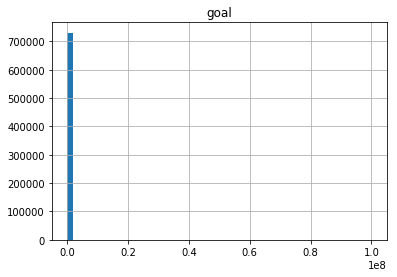

In [7]:
df.hist('goal', bins = 50)

In [ ]:
sortbyPrice = df.sort_values('converted_pledged_amount', axis = 0, ascending = False)

In [8]:
bins = [1000, 3000, 7000, 15000, 50000, 150000, 1000000]

In [ ]:
sortbyPrice.head()

In [9]:
df.hist('converted_pledged_amount', bins = bins)

KeyError: "['converted_pledged_amount'] not in index"

In [ ]:
mpl.pyplot.scatter(df['converted_pledged_amount'], df['backers_count'])

In [ ]:
mpl.pyplot.boxplot(mergedData['converted_pledged_amount'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a194067f0>]],
      dtype=object)

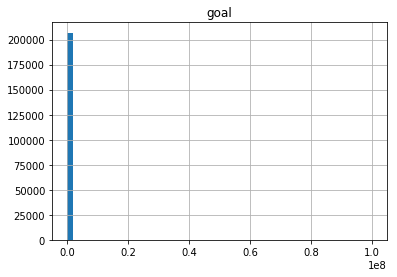

,Unnamed: 0,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
511,NaN,68929.0,Pebble is a customizable watch. Download new w...,"{""id"":28,""name"":""Product Design"",""slug"":""desig...",10266845.0,US,1.332451e+09,"{""id"":597507018,""name"":""Pebble Technology"",""sl...",USD,$,...,pebble-e-paper-watch-for-iphone-and-android,https://www.kickstarter.com/discover/categorie...,True,True,successful,1.337396e+09,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",10266845.74,domestic
1651,NaN,68929.0,Pebble is a customizable watch. Download new w...,"{""id"":28,""name"":""Product Design"",""slug"":""desig...",10266845.0,US,1.332451e+09,"{""id"":597507018,""name"":""Pebble Technology"",""sl...",USD,$,...,pebble-e-paper-watch-for-iphone-and-android,https://www.kickstarter.com/discover/categorie...,True,True,successful,1.337396e+09,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",10266845.74,international
2335,NaN,63416.0,Cracking open the last closed platform: the TV...,"{""id"":270,""name"":""Gaming Hardware"",""slug"":""gam...",8596474.0,US,1.337045e+09,"{""id"":33844207,""name"":""OUYA"",""slug"":""ouya"",""is...",USD,$,...,ouya-a-new-kind-of-video-game-console,https://www.kickstarter.com/discover/categorie...,True,True,successful,1.344492e+09,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",8596474.58,international
2133,NaN,63416.0,Cracking open the last closed platform: the TV...,"{""id"":270,""name"":""Gaming Hardware"",""slug"":""gam...",8596474.0,US,1.337045e+09,"{""id"":33844207,""name"":""OUYA"",""slug"":""ouya"",""is...",USD,$,...,ouya-a-new-kind-of-video-game-console,https://www.kickstarter.com/discover/categorie...,True,True,successful,1.344492e+09,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",8596474.58,international
1682,NaN,69320.0,Yu Suzuki presents the long awaited third inst...,"{""id"":35,""name"":""Video Games"",""slug"":""games/vi...",6333295.0,US,1.433238e+09,"{""id"":1569150382,""name"":""Ys Net"",""slug"":""ysnet...",USD,$,...,shenmue-3,https://www.kickstarter.com/discover/categorie...,True,True,successful,1.437184e+09,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",6333295.77,international


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a227bbc88>]],
      dtype=object)

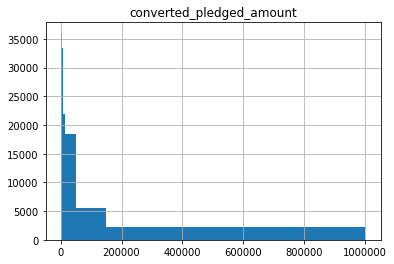

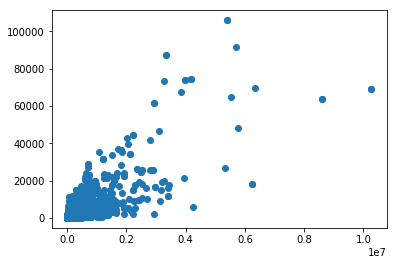

{'whiskers': [<matplotlib.lines.Line2D at 0x1a24b29160>,
 'caps': [<matplotlib.lines.Line2D at 0x1a24b297f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a24b20908>],
 'medians': [<matplotlib.lines.Line2D at 0x1a24b29e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a24b33208>],
 'means': []}

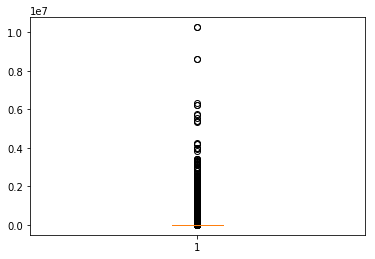